# PyTorch and Deep Neural Networks

Welcome to the Reinforcement Learning Lab! This is an introductory tutorial for you to familiarize yourself with [PyTorch](https://pytorch.org).


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as distributions
import torch.nn.functional as F
#from torchviz import make_dot
import numpy as np
import matplotlib.pyplot as plt

def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')
  
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

# Introduction 
PyTorch is mainly based on tensor, which are very similar to numpy arrays. More specifically, we can define and add different tensors together as in numpy:

In [26]:
x = torch.zeros(2, 3)
y = torch.ones(2, 3)
z = x + y

print(x)
print("+")
print(y)
print("=")
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
+
tensor([[1., 1., 1.],
        [1., 1., 1.]])
=
tensor([[1., 1., 1.],
        [1., 1., 1.]])


x = torch.zeros(2, 3) creates a torch tensor with two rows and three columns of zeros. Similarly is done with y = torch.ones(2, 3), but this time with ones. Finally, we can obtain the resulting sum of the two using the standard "+" operator.

We can also play along different tensor dimension, like in numpy, for example

In [27]:
sum_of_rows = torch.sum(z, dim=1)
print(sum_of_rows)

sum_of_columns = torch.sum(z, dim=0)
print(sum_of_columns)

tensor([3., 3.])
tensor([2., 2., 2.])


As we can notice, setting dim=1, we obtain the sum over the rows, while with dim=0 we have the sum over the columns. 

Then is possible to convert a PyTorch tensor into a numpy array and vice versa

In [28]:
x_np = np.random.randn(2, 3)
print("Your random numpy array is:\n", x_np)

x = torch.from_numpy(x_np)
print("\nYour Torch tensor from a random numpy array is:\n", x)

# let's modify the numpy array
x_np[:] = 0
print("\nx has value:\n", x)
print("x_np has value:\n", x_np)

Your random numpy array is:
 [[ 0.22387301  0.36494219  0.60212488]
 [-0.37944588  1.27697633  0.0241637 ]]

Your Torch tensor from a random numpy array is:
 tensor([[ 0.2239,  0.3649,  0.6021],
        [-0.3794,  1.2770,  0.0242]], dtype=torch.float64)

x has value:
 tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
x_np has value:
 [[0. 0. 0.]
 [0. 0. 0.]]


As you notice, torch.from_numpy() converts and copies a numpy array into a torch tensor also modifying the data type and the memory address. In fact, we obtain a torch tensor of float64 instead of a classical float32 and if we modify x_np, we automatically modify x. To preserve the data type and create an independent variable we can write: 

In [29]:
x_np = np.random.randn(2, 3)
print("Your random numpy array is:\n", x_np)

x = torch.from_numpy(x_np).type(torch.float)
print("\nYour Torch tensor from a random numpy array adding .type(torch.float) is:\n", x)

# let's modify the numpy array
x_np[:] = 0
print("\nx has value:\n", x)
print("x_np has value:\n", x_np)

Your random numpy array is:
 [[ 0.60167701 -0.95995701  1.74852521]
 [ 1.68646181 -0.03624884  0.75602025]]

Your Torch tensor from a random numpy array adding .type(torch.float) is:
 tensor([[ 0.6017, -0.9600,  1.7485],
        [ 1.6865, -0.0362,  0.7560]])

x has value:
 tensor([[ 0.6017, -0.9600,  1.7485],
        [ 1.6865, -0.0362,  0.7560]])
x_np has value:
 [[0. 0. 0.]
 [0. 0. 0.]]


# Numerical Optimization

PyTorch like TensorFlow is a framework for the optimization of non-linear functions. To perform an optimization task with PyTorch, there are three fundamental components:
* **Variables:** the variables to optimize, notice that since PyTorch exploits numerical method (i.e., gradient descent), we must always initialize the variables to an initial value.
* **Optimizer:** the object that applies the gradient to each variable exploiting different optimization techniques (e.g., Adam or SGD)
* **Objective Function:** the function we aim to optimize
In the following example we will find the minimum of the function $(x-3)^2$ and the corresponding assignment for $x$.

1) First, we must initialize the variables of the equation to an initial value *(notice that in our function we have only one variable)*

In [30]:
x = torch.tensor([0.0], requires_grad=True)
print(x)


tensor([0.], requires_grad=True)


Torch is a little bit different from Tensorflow. As we can notice, in order to compute the gradient of a given tensor, we should specify the paramenter "requires_grad=True". this flag allows us to specify that for this tensor from now on we want to keep track of two pieces of information: 
- data: that is, the values of the tensor
- grad: the last gradient value computed for that tensor (if no gradient has been computed, a None result is reported)

In [31]:
print(x.data)
print(x.grad)

tensor([0.])
None


2) Second, we should instantiate the optimizer; a common choice is Stochastic Gradient Descent.

In [32]:
from torch.optim import SGD
optimizer = SGD([x], lr=0.001)

3) Finally, we perform the actual optimization process. The first step is to write the objective function, compute the gradient for each variable, and apply the gradient variable-wise to find the minimum of the function. The numerical nature of gradient descent requires multiple iterations of the algorithm to reach the minimum

In [33]:
pre_optimization_value = x.item()

for _ in range(5000):  # Adjust the number of iterations as needed
    # Write the objective function
    objective = (x-3)**2
    
    # Clear previous gradients
    optimizer.zero_grad()
    
    # Compute the gradient with respect to x
    objective.backward()
    
    # Update x based on the computed gradient
    optimizer.step()

# After optimization, x will contain the value that minimizes the objective function
minimized_value = x.item()

In [34]:
print( f"The initial value of the variable 'x' was: {pre_optimization_value}" )
print( f"The value of 'x' after the optimization process is: {round(minimized_value,2)}\n" )
print( f"The minimum of the function (x-3)**2 is\n {round((minimized_value-3)**2,2)} with x={round(minimized_value,2)}" )

The initial value of the variable 'x' was: 0.0
The value of 'x' after the optimization process is: 3.0

The minimum of the function (x-3)**2 is
 0.0 with x=3.0


In [35]:
# Visualize the computation graph: if you have install torchviz you can run the following command
#make_dot(objective, params={"x": x}).render("comp_graph1", format="png")

We can visualize the the computational graph created and exploited by PyTorch to perform the backpropagation:

<img src="comp_graph1.png" width="150">

Let's see in detail the computational graph generated:

We start from the green box, which represents the loss. The latter is the result of a "Power" operation, in fact we have the *^2* factor in our function. Before the ^2 operation, we have a subtraction captured by the "SubBackward0" node, and finally, we accumulate the updated gradient to the variable x, as we instantiated it with *require_grad=True*. 

**Important points to pay attention to:**
- You cannot perform in-place operations on tensors that have requires_grad=True. For example, if we tried to change the value of a tensor cell (y[0] = 1) we would get an error! This is because PyTorch is only able to keep track of our operations in terms of backpropagation, i.e., sum operations, power multiplication,etc...

- For the same reason, it is not possible to convert a tensor with requires_grad=True to numpy, since by sharing the same memory we would ruin the original tensor. Hence, 
*y.detach()* returns a new tensor identical to y but with "requires_grad=False". The original y is not modified, but beware that they still share the same memory, so modifications on "y_detached" results also to y!!! To make sure you have a new memory cell, it is safer to perform a *y.detach().clone()*

## Multivariable Optimization

Of course, the function $(x-3)^2$ can be easily optimized in closed form. In contrast, TensorFlow is particularly useful when we want to optimize **non-linear**, **complex**, and **multivariable** functions. Suppose, for example, that we want to find the minimum of the following two variable function:

$$ 2x^2 + 3y^2 - 12x - 6y + 9 $$

In [36]:
def objective_function(x, y):
    return 2*x**2 + 3*y**2 - 12*x - 6*y + 9

x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([1.0], requires_grad=True)
optimizer = SGD([x,y], lr=0.001)

pre_optimization_value_x = x.item()
pre_optimization_value_y = y.item()

for _ in range(5000):  # Adjust the number of iterations as needed
    # Write the objective function
    objective = objective_function(x, y)
    
    # Clear previous gradients
    optimizer.zero_grad()
    
    # Compute the gradient with respect to x
    objective.backward()
    
    # Update x based on the computed gradient
    optimizer.step()

# After optimization, x will contain the value that minimizes the objective function
minimized_value_x = x.item()
minimized_value_y = y.item()

print( f"The initial value of the variable 'x' was: {pre_optimization_value_x}" )
print( f"The initial value of the variable 'y' was: {pre_optimization_value_y}" )
print( f"The value of 'x' after the optimization process is: {round(minimized_value_x,2)}" )
print( f"The value of 'y' after the optimization process is: {round(minimized_value_y,2)}" )
print()
print( f"The minimum of the function 2x^2 + 3y^2 - 12x - 6y + 9 is\n {round((2*minimized_value_x**2 + 3*minimized_value_y**2 - 12*minimized_value_x - 6*minimized_value_y + 9),2)} with x={round(minimized_value_x,2)} and y={round(minimized_value_y,2)}" )

The initial value of the variable 'x' was: 1.0
The initial value of the variable 'y' was: 1.0
The value of 'x' after the optimization process is: 3.0
The value of 'y' after the optimization process is: 1.0

The minimum of the function 2x^2 + 3y^2 - 12x - 6y + 9 is
 -12.0 with x=3.0 and y=1.0


In [37]:
# Visualize the computation graph
#make_dot(objective, params={"x": x, "y": y}).render("comp_graph2", format="png")


<img src="comp_graph2.png" width="400">

From the visualization of the function, it is possible to see that the minimum is actually in **<3, 1>**.

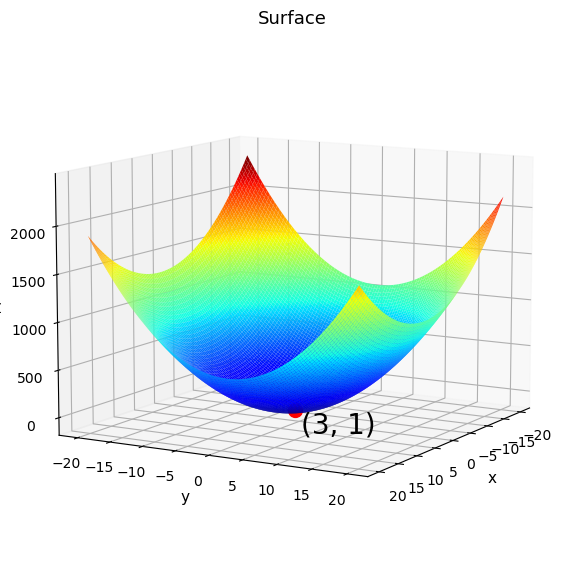

In [38]:
def f(x, y):
    return 2*x**2 + 3*y**2 - 12*x - 6*y + 9

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')

# Inserting the point <3, 1> on the surface
point_x = round(minimized_value_x,2)
point_y = round(minimized_value_y,2)
point_z = f(point_x, point_y)

ax.set_title("Surface", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

# Plot the point after the surface plot
ax.scatter([point_x], [point_y], [point_z], color='red', s=100, zorder=100)
ax.text(point_x, point_y+1, point_z-300, "(3, 1)", color='black', fontsize=20,  verticalalignment='bottom')  # Adding text annotation

# Rotate the plot
ax.view_init(elev=10, azim=30)  

plt.savefig("function.png")
plt.show()


## Neural network with PyTorch
Very often we hear about architectures, layers, etc. PyTorch provides libraries and methods for the construction of these neural networks! In particular, everything is done through so-called Modules. The mother class that represents the core of computation graph creation is called torch.nn.Module. Each block of this core represents a layer of our neural network. Let's look at an example, suppose we want to build a neural network like this:


![Network](images/neural_networks.png)

With PyTorch you can easily create a deep neural network with this class.

In [39]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

PyTorch provides several non-linear activation functions:

ReLU
Sigmoid
Tanh


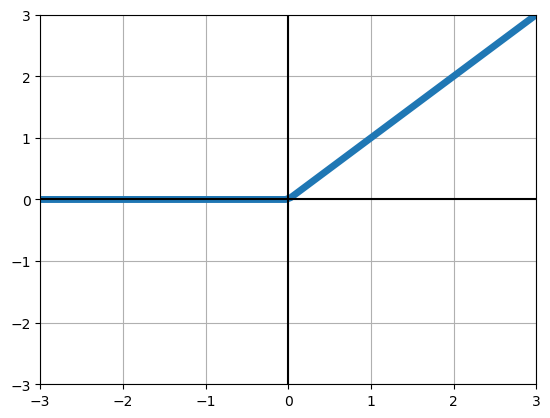

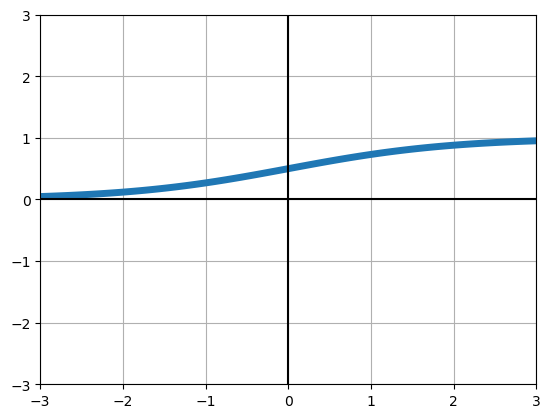

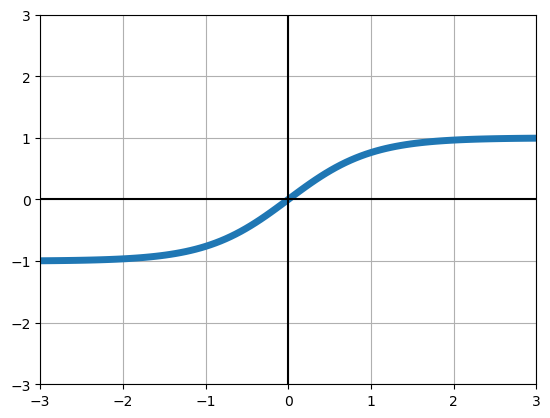

In [40]:
# Activation functions
xs = torch.linspace(-3, 3, 100)
ys = F.relu(xs)
print("ReLU")
plot(xs.numpy(), ys.numpy())
ys = F.sigmoid(xs)
print("Sigmoid")
plot(xs.numpy(), ys.numpy())
ys = F.tanh(xs)
print("Tanh")
plot(xs.numpy(), ys.numpy())

And the creating an object of the Class Net and save the dictionary of the weights and biases that can then be loaded on another model, as shown below...

In [41]:
net = Net(input_size=3, output_size=2)
print(net)
torch.save(net.state_dict(), 'net_weights.pth')

Net(
  (fc1): Linear(in_features=3, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=2, bias=True)
)


In general, can be useful to create a DNN using hyperparameters, e.g., the number of hidden layers or the size of each hidden. Here we provide an examplanatory example of how we can create a "dynamic" neural network with the same size and we load the same random weights of the previous one.

In [42]:
class DynamicNet(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_hidden_layers):
        super(DynamicNet, self).__init__()
        self.num_hidden_layers = num_hidden_layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        for i in range(num_hidden_layers):
            layer_name = f"fc{i+2}"
            self.add_module(layer_name, nn.Linear(hidden_size, hidden_size))  
        self.fc5 = nn.Linear(hidden_size, output_size)
       
    def forward(self, x):
        x = F.relu(self.fc1(x))
        for i in range(2, self.num_hidden_layers + 2):
            x = F.relu(getattr(self, f'fc{i}')(x).to(x.dtype))
        x = self.fc5(x)
        return x   

In [43]:
# Example usage:
input_size = 3
output_size = 2
hidden_size = 32
num_hidden_layers = 3

net_new = DynamicNet(input_size, output_size, hidden_size, num_hidden_layers)
print(net_new)
loaded_weights = torch.load('net_weights.pth')
net_new.load_state_dict(loaded_weights)

DynamicNet(
  (fc1): Linear(in_features=3, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=2, bias=True)
)


<All keys matched successfully>

All the PyTorch functions requires as input a torch tensor, hence you must convert your numpy array into a PyTorch tensor before performing the forward propagation. To pass an input to the neural network and receive the corresponding output, you just have to call the class object with the desired input parameter. PyTorch will automatically call the forward function defined in the Class so do not have to call net.forward(x)!

In [44]:
x = [np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)]
x_tensor = torch.tensor(x, requires_grad=True)
y_net = net(x_tensor)
y_dyn_net = net_new(x_tensor)


# net.forward(x_tensor) <- NOT NECESSARY 
print(f"Prediction with the first DNN: {y_net}\nand with the second one: {y_dyn_net}")


Prediction with the first DNN: tensor([-0.0082, -0.0670], grad_fn=<ViewBackward0>)
and with the second one: tensor([-0.0082, -0.0670], grad_fn=<ViewBackward0>)


# DNNs are (non-)linear functions!
Deep Neural Networks are just complex, non-linear and multivariable functions that can therefore be optimized with PyTorch to reach a global minimum. In this context, the objective function we aim to minimize is commonly called **loss function**, and the trainable variables that constitute the neural network function are called **weights** and **biases**.

### Example
Suppose we want to train a neural network to add the two numbers provided in input. The idea is to minimize the difference between the predicted output and the expected value over time, until we find the correct assignment for the weights and biases.

1) First, we create the neural network

In [45]:
input_size = 2
output_size = 1
hidden_size = 8
num_hidden_layers = 1

model = DynamicNet(input_size, output_size, hidden_size, num_hidden_layers)

2) Second, we define the objective function (i.e., **loss**), given that our problem requires regression, we exploit the MeanSquaredError (MSE) loss. We refer to the official documentation for details ([here](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)).

In [46]:
loss_fn = nn.MSELoss()

3) Third, we initialize the optimizer and generate the dataset (notice that for DRL, the dataset is automatically generated through the interactions with the environment).

In [47]:
# Instantiate the optimizer; Adam is a standard optimizer that sows excellent results in real-world tasks
from torch import optim
optimizer = optim.Adam(model.parameters(), lr=1e-3)

4) Finally, we perform the actual optimization process

In [48]:
custom_input = torch.tensor([7.0, 14.0])
print( "\nPre Training Result" )
print( "\tForward Propagation: 7.0 + 14.0 =", model(custom_input).detach().numpy().item())

# Starting the gradient descent process
for _ in range(5000):
        # Write the objective function on the tape
        x = torch.tensor([np.random.uniform(0, 10), np.random.uniform(0, 10)])
        target = x[0]+x[1]
        y = model(x)
        loss = loss_fn(y, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
print( "Post Training Result" )
print( "\tForward Propagation: 7.0 + 14.0 =", model(custom_input).detach().numpy().item())


Pre Training Result
	Forward Propagation: 7.0 + 14.0 = 0.9920083284378052


Post Training Result
	Forward Propagation: 7.0 + 14.0 = 20.98674964904785
